In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bild nehmen
Label dazu finden
In liste pfad und label speichern
normal weitermachen.

In [ ]:
import posixpath
import json
import pickle
import torch
import numpy as np
import cv2
from matplotlib import pyplot as plt
traco_path = "/content/drive/MyDrive/Cornhole/annotat.json" 
print(traco_path)
with open(traco_path) as f:
    ann = json.loads(f.read())
print(ann)

i=0 
pos=[]
for key in ann:
 
  if(key["img"][-12:] == "IMG_3475.JPG"):
    print("got it")
    print("kp-1: ",key["kp-1"])
    for j in key["kp-1"]:
      print("x: ", j["x"])
      print("y: ", j["y"])
      pos.append((j["x"],j["y"]))
    if(i==0):
      ann.pop(i)
    i+=1
print(pos)
print(ann)
print(ann[1])
directory_image = "/content/drive/MyDrive/Cornhole/imagescornhole/"
import os
for file in os.listdir(directory_image):
            filename = os.fsdecode(file)
            #print(filename)
            #print(directory_image + filename[:-4])


/content/drive/MyDrive/Cornhole/annotat.json
[{'img': '/data/upload/6/2414f064-IMG_4554.JPG', 'id': 1096, 'annotator': 1, 'annotation_id': 1130, 'created_at': '2022-10-31T12:48:13.131409Z', 'updated_at': '2022-10-31T12:48:13.131409Z', 'lead_time': 3.211}, {'img': '/data/upload/6/0a29190d-IMG_4553.JPG', 'id': 1095, 'kp-1': [{'x': 67.12141882673943, 'y': 35.470668485675304, 'width': 0.2728512960436562, 'keypointlabels': ['Sack'], 'original_width': 256, 'original_height': 256}], 'annotator': 1, 'annotation_id': 1129, 'created_at': '2022-10-31T12:48:09.506799Z', 'updated_at': '2022-10-31T12:48:09.506799Z', 'lead_time': 2.158}, {'img': '/data/upload/6/aa5a84e2-IMG_4552.JPG', 'id': 1094, 'kp-1': [{'x': 63.84720327421555, 'y': 27.830832196452935, 'width': 0.2728512960436562, 'keypointlabels': ['Sack'], 'original_width': 256, 'original_height': 256}, {'x': 72.57844474761255, 'y': 45.70259208731242, 'width': 0.2728512960436562, 'keypointlabels': ['Sack'], 'original_width': 256, 'original_height

In [ ]:
import numpy as np
import cv2
import os
import pickle
import pathlib
import json
from sklearn.model_selection import train_test_split


class DataReader:
    def __init__(self) -> None:
      #directory in which the videos are stored
        self.directory_images = "/content/drive/MyDrive/Cornhole/imagescornhole/"
        #video list in which first the path to frame is stored. Then the frame number and then the position of the bag
        self.images_list = []
        #call funktion to store each frame 
        self.read_images()
        x_train, x_test = train_test_split(self.images_list, test_size=0.2)
        print(len(self.images_list), len(x_train), len(x_test))
        pickle.dump(x_train, open("/content/drive/MyDrive/Cornhole/frames_train.p", "wb"))
        pickle.dump(x_test, open("/content/drive/MyDrive/Cornhole/frames_test.p", "wb"))

    def read_images(self):
      #take directory of videos
        directory = os.fsencode(self.directory_images)
        i=0
        number_images=0
        for file in os.listdir(directory):
            filename = os.fsdecode(file)
            if filename.endswith(".JPG"):
                number_images +=1
                print(number_images)
                i+=1
                # read images
                img = cv2.imread(self.directory_images + filename)
                #read label
                traco_path = "/content/drive/MyDrive/Cornhole/annotat.json" 
                with open(traco_path) as f:
                    ann = json.loads(f.read())
                    # perform file operations

                i=0
                pos=[]
                for key in ann:
                  
                  if(key["img"][-12:] == filename):
                    print(key["img"][-12:],filename)
                    for j in key["kp-1"]:
                      pos.append((j["x"],j["y"]))
                    ann.pop(i)
                i+=1
                #create array for each id and position
                #create new path to frame
                path_to_frame = "/content/drive/MyDrive/Cornhole/imagescornhole/" + filename[:-4]              
                #store frame
                pickle.dump(img, open(path_to_frame + ".p", "wb"))
                #store path to frame in video list
                self.images_list.append((path_to_frame + ".p", pos))
                os.remove("/content/drive/MyDrive/Cornhole/imagescornhole/" + filename)
                print(filename,pos)
                

                # for curr_frame in range(frameCount):
                #    self.video_list.append((self.directory_images+filename[:-3]+"p",curr_frame,whatever_dict[curr_frame]))
                continue
            else:
                continue


# To create a dataset class, I need a path-file that contains all of the train paths and another one for the test-paths
# This is necessary to allow multiple dataset instances to work in parallel


if __name__ == "__main__":
    newReader = DataReader()



# Ab hier Datenset für Dataloader

False
<class 'torch.Tensor'> <class 'torch.Tensor'>


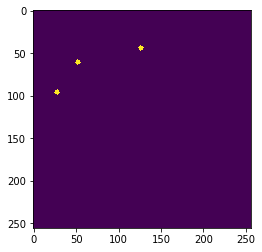

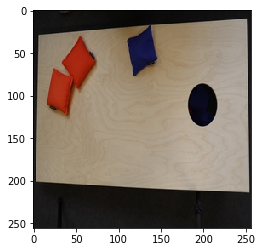

In [ ]:
import torch
import time
from torch.utils.data import Dataset
import pickle
import numpy as np 
import cv2
from matplotlib import pyplot as plt




class TracoDataset(Dataset):
  #load the pickl lists
  def __init__(self,  mode,transform=None):
    if mode == 'train':
        self.samples =  pickle.load( open("/content/drive/MyDrive/Cornhole/frames_train.p", "rb" ) )
    elif mode == 'test':
        self.samples =  pickle.load( open("/content/drive/MyDrive/Cornhole/frames_test.p", "rb" ) )
    else:
        raise ValueError(f'Selected mode {mode} is not implemented')
    pass
    self.transform = transform
  #needed for dataloader
  def __len__(self):
    return len(self.samples)

  def __getitem__(self, idx):
    #take frame
    frame = pickle.load( open(self.samples[idx][0], "rb" ) )
    # convert to RGB
    im_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #resize frame
    #im_rgb = cv2.resize(im_rgb, dsize=(256,256))

    frameWidth,frameHeight,channels = frame.shape
    # Creation of target
    pos_list = self.samples[idx][1]
    

    base = np.zeros([256,256],dtype=np.uint8)
    for elem in pos_list:      
        #reduziert die pos auf 256,256 bild
        pos_x = (elem[0]/100)*256
        pos_y = (elem[1]/100)*256
        #print(pos_x,pos_y)
        RADIUS = 3
        base = cv2.circle(base, (int(pos_x),int(pos_y)), RADIUS,100, -1)
        


    im_rgb = self.transform(im_rgb)
    base = self.transform(base)
    print(type(im_rgb),type(base))
    return im_rgb,base


if __name__=="__main__":
    from torchvision import transforms
    train_transform = transforms.Compose([transforms.ToTensor()])
    print(torch.cuda.is_available())
    some_dataset = TracoDataset(mode = 'train',transform=train_transform)
    img,target =some_dataset.__getitem__(100)
    
    f1 = plt.figure(1)
    target = torch.squeeze(target)
    target = target.numpy()
    plt.imshow(target, interpolation='nearest')
    plt.show()
    f2 = plt.figure(12)
    img = torch.squeeze(img)
    img = img.numpy()
    img = np.transpose(img, (1,2,0))
    plt.imshow(img, interpolation='nearest')
    plt.show()

# Ab hier u net

## Ab hier Loss function(dice loss)

In [ ]:
class loss(): 
  #
  def dice_loss(pred, target, smooth = 1.):
      pred = pred.contiguous()
      target = target.contiguous()    

      intersection = (pred * target).sum(dim=2).sum(dim=2)
      
      loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))
      
      return loss.mean()

## Ab hier Model Aufbau

In [ ]:
import torch

from torchvision import transforms, datasets, models
from torchvision.models import resnet18, ResNet18_Weights
import math
from torchvision import transforms
import time
from matplotlib import pyplot as plt
import numpy as np

def convrelu(in_channels, out_channels, kernel, padding):
    return torch.nn.Sequential(
        torch.nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        torch.nn.ReLU(inplace=True),
    )

from collections import defaultdict
import torch.nn.functional as F


def dice_loss(pred, target, smooth = 1.):
    pred = pred.contiguous()
    target = target.contiguous()    

    intersection = (pred * target).sum(dim=2).sum(dim=2)
    
    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))
    
    return loss.mean()

def calc_loss(pred, target, metrics, bce_weight=0.9):
    bce = F.binary_cross_entropy_with_logits(pred, target)

    pred = torch.sigmoid(pred)
    dice = dice_loss(pred, target)

    loss = bce * bce_weight + dice * (1 - bce_weight)

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))

    print("{}: {}".format(phase, ", ".join(outputs)))


class ResNetUNet(torch.nn.Module):
    def __init__(self, n_class):
        super().__init__()

        self.base_model = models.resnet18(pretrained=True)
        self.base_layers = list(self.base_model.children())
        #self.hidden_size1 = 64
        #self.hidden_size2 
        #self.hidden_size3
        #self.hidden_size4

        self.layer0 = torch.nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
        self.layer0_1x1 = convrelu(64, 64, 1, 0)
        self.layer1 = torch.nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)
        self.layer1_1x1 = convrelu(64, 64, 1, 0)
        self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)
        self.layer2_1x1 = convrelu(128, 128, 1, 0)
        self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)
        self.layer3_1x1 = convrelu(256, 256, 1, 0)
        self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
        self.layer4_1x1 = convrelu(512, 512, 1, 0)

        self.upsample = torch.nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
        self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
        self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
        self.conv_up0 = convrelu(64 + 256, 128, 3, 1)

        self.conv_original_size0 = convrelu(3, 64, 3, 1)
        self.conv_original_size1 = convrelu(64, 64, 3, 1)
        self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)

        self.conv_last = torch.nn.Conv2d(64, n_class, 1)

    def forward(self, input):
        x_original = self.conv_original_size0(input)
        x_original = self.conv_original_size1(x_original)

        layer0 = self.layer0(input)
        layer1 = self.layer1(layer0)
        layer2 = self.layer2(layer1)
        layer3 = self.layer3(layer2)
        layer4 = self.layer4(layer3)

        layer4 = self.layer4_1x1(layer4)
        x = self.upsample(layer4)
        layer3 = self.layer3_1x1(layer3)
        x = torch.cat([x, layer3], dim=1)#skip connections
        x = self.conv_up3(x)

        x = self.upsample(x)
        layer2 = self.layer2_1x1(layer2)
        x = torch.cat([x, layer2], dim=1)
        x = self.conv_up2(x)

        x = self.upsample(x)
        layer1 = self.layer1_1x1(layer1)
        x = torch.cat([x, layer1], dim=1)
        x = self.conv_up1(x)

        x = self.upsample(x)
        layer0 = self.layer0_1x1(layer0)
        x = torch.cat([x, layer0], dim=1)
        x = self.conv_up0(x)

        x = self.upsample(x)
        x = torch.cat([x, x_original], dim=1)
        x = self.conv_original_size2(x)

        out = self.conv_last(x)

        return out

  

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Ab hier train loop

In [ ]:
import copy
def train_model(model, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        since = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                #scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])

                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

## Ab hier Dataloader with Batch size initialisierung



In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

# make dataloder

normalize = transforms.Normalize((0.1307,), (0.3081,))

train_transform = transforms.Compose([transforms.ToTensor(),normalize])
#make test and train set
train_set = TracoDataset(transform=train_transform,mode='train')
val_set = TracoDataset(transform=train_transform,mode='test')

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 16
dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
}

## ab hier start model

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

NUM_EPOCHS = 25
N_CLASS = 1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = ResNetUNet(N_CLASS).to(device)

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=30, gamma=0.1)

model = train_model(model, optimizer_ft, None, NUM_EPOCHS)


In [ ]:
#!pip install torchinfo
from torchsummary import summary
summary(model, input_size=(3, 256, 256),)

## Plotting

In [ ]:
torch.save(model, '/content/drive/MyDrive/Cornhole/model_cornhole.pth')

In [ ]:
train_transform = transforms.Compose([transforms.ToTensor()])
some_dataset = TracoDataset(transform=train_transform,mode='test')
for i in range(5):
  img,target =some_dataset.__getitem__(i)
  img2 = img
  img = torch.unsqueeze(img,0).to(device)
  some_result = model(img)
  some_result = torch.squeeze(some_result,0)
  some_result = torch.squeeze(some_result,0)
  f1 = plt.figure(1)
  plt.imshow(some_result.cpu().detach().numpy(), interpolation='nearest')
  f2 = plt.figure(2)
  target = torch.squeeze(target)
  plt.imshow(target.numpy(), interpolation='nearest')
  f3 = plt.figure(3)
  img2 = torch.squeeze(img2)
  img2 = img2.numpy()
  img2 = np.transpose(img2, (1,2,0))
  plt.imshow(img2, interpolation='nearest')
  plt.show()
print("Jetzt kommt train!!---------------------------------------------")
some_dataset = TracoDataset(transform=train_transform,mode='train')
for i in range(5):
  img,target =some_dataset.__getitem__(i)
  img2 = img
  img = torch.unsqueeze(img,0).to(device)
  some_result = model(img)
  some_result = torch.squeeze(some_result,0)
  some_result = torch.squeeze(some_result,0)
  f1 = plt.figure(1)
  plt.imshow(some_result.cpu().detach().numpy(), interpolation='nearest')
  f2 = plt.figure(2)
  target = torch.squeeze(target)
  plt.imshow(target.numpy(), interpolation='nearest')
  f3 = plt.figure(3)
  img2 = torch.squeeze(img2)
  img2 = img2.numpy()
  img2 = np.transpose(img2, (1,2,0))
  plt.imshow(img2, interpolation='nearest')
  plt.show()

In [ ]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torch.load('/content/drive/MyDrive/Cornhole/model_cornhole.pth',map_location=torch.device('cpu'))

### Testbilder einlesen und model testen. Dann den Output und den Groundtruth in prediction speichern.

1.12.1+cu113
img: <class 'numpy.ndarray'>
im_rgb: <class 'torch.Tensor'>
im2: <class 'torch.Tensor'>


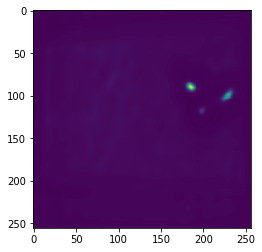

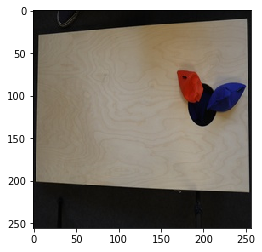

[(182.3083219645293, 81.37517053206003), (230.85402455661665, 98.83765347885402)]


In [ ]:
train_transform = transforms.Compose([transforms.ToTensor()])
some_dataset = TracoDataset(transform=train_transform,mode='test')
samples =  pickle.load( open("/content/drive/MyDrive/Cornhole/frames_train.p", "rb" ) )
from torchvision import transforms
train_transform = transforms.Compose([transforms.ToTensor()])
prediction = []
for i in range(1):
  i=i+10
  img = pickle.load( open(samples[i][0], "rb" ) )
  pos_tupel = samples[i][1]
  # convert to RGB
  print("img:",type(img))
  im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  im_rgb = train_transform(im_rgb)
  print("im_rgb:",type(im_rgb))
  img = torch.unsqueeze(im_rgb,0).to(device)
  print("im2:",type(img))
  some_result = model(img)
  some_result = torch.squeeze(some_result,0)
  some_result = torch.squeeze(some_result,0)
  f1 = plt.figure(1)
  plt.imshow(some_result.cpu().detach().numpy(), interpolation='nearest')
  
  f3 = plt.figure(3)
  im_rgb = torch.squeeze(im_rgb)
  im_rgb = im_rgb.numpy()
  im_rgb = np.transpose(im_rgb, (1,2,0))
  plt.imshow(im_rgb, interpolation='nearest')
  plt.show()

  #posliste auf 256 bild converten
  pos_list=[]
  for coordinate in pos_tupel:
    x= coordinate[0]
    y= coordinate[1]
    x=(x/100)*256
    y=(y/100)*256
    pos_list.append((x,y))

  print(pos_list)
  prediction.append((some_result.cpu().detach().numpy(),pos_list))
  

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113


NameError: ignored

# Ab hier das max instensity herrausfinden

In [ ]:
def get_densest_numpy_patches(pred):
  image,pos_list = pred
  f2 = plt.figure(30)
  plt.imshow(image, interpolation='nearest')
  plt.show()
  print("original")
  radius = 10   
  maximum_value_list = [] 
  #get maximum value coordinates
  a = np.argmax(image)
  l=image.shape[0]
  c = a%l
  r = int(a/l)
  #make threshold the first highest value that could be found
  threshold = image[r,c]*0.5

  #for every pixel that is at least as intens as the first
  #Annahme: Alle Säcke haben am Ende wenigstens einen Pixel mit der höchsten intensität. Ansonsten einfach eine Range von 5 % einrichten threshold * 0.95
  #while image[r,c] >= threshold:
  NUMBER_OF_HEX = 8
  for i in range(NUMBER_OF_HEX):
    if( r < 5 or c < 5 ): #rand ausparen
      passes = False
      while(passes == False):
        print("suchen")
        image = cv2.circle(image, (c,r), 2,0, -1)
        a = np.argmax(image)
        l=image.shape[0]
        c = a%l
        r = int(a/l)
        if(r >5 and c>5):
          if(image[r,c]<threshold):
            return maximum_value_list
    #Alle pixel darum auf 0 setzten damit argmax neuen höchsten finden kann
    image = cv2.circle(image, (c,r), radius,0, -1)
    f1 = plt.figure(i)
    plt.imshow(image, interpolation='nearest')
    plt.show()
    #Höhepunkt hinzufügen
    maximum_value_list.append([c,r])
    a = np.argmax(image)
    c = a%256
    r = int(a/256)
    if(image[r,c]<threshold):
      return maximum_value_list

  return maximum_value_list

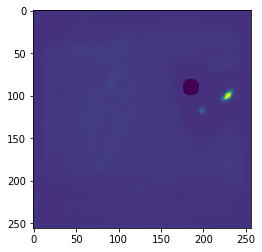

original


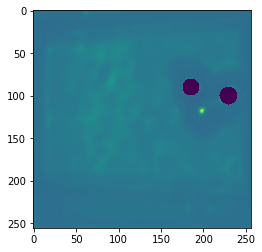

[[229, 100]]


In [ ]:
###hier wird weitergemacht und die peaks gesucht
list_max_value_unordered = []
for i in prediction:
  list = get_densest_numpy_patches(i)
  print(list)
  list_max_value_unordered.append(list)

In [ ]:
print(prediction[0][1])

[(182.3083219645293, 81.37517053206003), (230.85402455661665, 98.83765347885402)]


## Positionen in Json speichern

In [ ]:
import json
print(list_max_value_ordered)
json_predicted = {}
json_predicted['rois'] = []
frame=0
for i in list_max_value_ordered:
  id=0
  for j in i:
    json_predicted['rois'].append({
    'z' : frame,
    'id' : id,
    'pos': j
    })
    id+=1
  frame +=1
print(json_predicted)

# Score berechnen

In [ ]:
print(frameHeight,frameWidth)
x=0
for i in json_predicted["rois"]:
  pos = i['pos']
  pos_x = np.round((pos[0]/256)*frameHeight,2)
  pos_y = np.round((pos[1]/256)*frameWidth,2)
  i['pos'] = [pos_x,pos_y]
"""
for i in label_json["rois"]:
  pos = i['pos']
  pos_x = np.round(pos[0],2)
  pos_y = np.round(pos[1],2)
  i['pos'] = [pos_x,pos_y]
"""
print(json_predicted['rois'])

#print(label_json['rois'])

In [ ]:
with open('/content/drive/MyDrive/data020.json', 'wb') as fp:
    pickle.dump(json_predicted, fp)

In [ ]:
x=0
distmean =0
distsum=0
dist5=0
dist10=0
dist20=0
dist30=0
distdrüber =0
for i in json_predicted['rois']:
  dist=0
  predx = i['pos'][0]
  predy = i['pos'][1]
  labelx=whatever_dict[x][0]
  labely=whatever_dict[x][1]
  dist = np.sqrt((labelx-predx)**2 + (labely-predy)**2)
  if(dist <= 5):
    dist5 +=1
  elif(dist <= 10):
    dist10 +=1
  elif(dist <= 20):
    dist20 +=1
  elif(dist <= 30):
    dist30 +=1
  elif(dist > 30):
    distdrüber +=1
  distsum += dist
  distmean += dist
  distmean = distmean/2
  x +=1
print("distmean: ",distmean)
print("distsum: ",distsum)
print("dist5: ",dist5/x,"%")
print("dist10: ",dist10/x,"%")
print("dist20: ",dist20/x,"%")
print("dist30: ",dist30/x,"%")
print("distdrüber: ",distdrüber/x,"%")

In [ ]:
import json
import pickle
with open('/content/drive/MyDrive/annotat.json', 'rb') as f1p:
  data = pickle.load(f1p)
print(type(data))
with open('/content/drive/MyDrive/data020.traco', 'w') as fp:
  json.dump(data, fp)
